# Time Series Forecasting
# Applying model on 'AvgTemp' data

In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
print("Imported Sucessfully")

Imported Sucessfully


In [2]:
#Reading data
data= pd.read_csv('MaunaLoaDailyTemps.csv',index_col='DATE',parse_dates=True)
print("Reading done!")

Reading done!


#### Data Preprocessing

In [3]:
data.head()

,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
DATE,,,,,
2014-01-01,33.0,46.0,40.0,657,1756
2014-01-02,35.0,50.0,43.0,657,1756
2014-01-03,36.0,45.0,41.0,657,1757
2014-01-04,32.0,41.0,37.0,658,1757
2014-01-05,24.0,38.0,31.0,658,1758


In [4]:
data.shape

(1825, 5)

In [5]:
data.isnull().sum()

MinTemp    4
MaxTemp    4
AvgTemp    4
Sunrise    0
Sunset     0
dtype: int64

In [6]:
df=data.dropna()

In [7]:
df.shape

(1821, 5)

In [8]:
df.isnull().sum()

MinTemp    0
MaxTemp    0
AvgTemp    0
Sunrise    0
Sunset     0
dtype: int64

In [9]:
df.head(10)

,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
DATE,,,,,
2014-01-01,33.0,46.0,40.0,657,1756
2014-01-02,35.0,50.0,43.0,657,1756
2014-01-03,36.0,45.0,41.0,657,1757
2014-01-04,32.0,41.0,37.0,658,1757
2014-01-05,24.0,38.0,31.0,658,1758
2014-01-06,22.0,39.0,31.0,658,1759
2014-01-07,28.0,45.0,37.0,658,1759
2014-01-08,30.0,41.0,36.0,659,1800
2014-01-09,29.0,42.0,36.0,659,1801


<AxesSubplot:xlabel='DATE'>

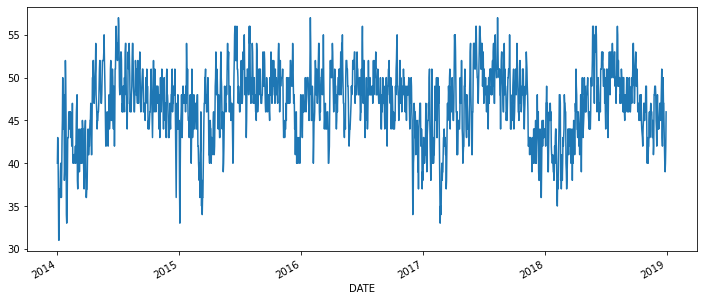

In [10]:
# Plotting graph
df['AvgTemp'].plot(figsize=(12,5))

#### Applying ADF test to find whether the data is stationary or not

In [11]:
from statsmodels.tsa.stattools import adfuller
def ad_test(dataset):
    dftest=adfuller(dataset,autolag="AIC")
    print("1.ADF:",dftest[0])
    print("2.P-Value:",dftest[1])
    print("3.Num of Lags:",dftest[2])
    print("4.Num Of Observations Used For ADF Regression and Critical Values Calculation:",dftest[3])
    print("5.Critical Values:")
    for key,val in dftest[4].items():
        print("\t",key,": ",val)
  

In [12]:
ad_test(df['AvgTemp'])

1.ADF: -6.55468012506878
2.P-Value: 8.67593748019951e-09
3.Num of Lags: 12
4.Num Of Observations Used For ADF Regression and Critical Values Calculation: 1808
5.Critical Values:
	 1% :  -3.433972018026501
	 5% :  -2.8631399192826676
	 10% :  -2.5676217442756872


p-value<0.05 so, the data is stationary.

In [13]:
from statsmodels.tsa.stattools import acf, pacf
a = acf(df['AvgTemp'], nlags=15)
pa = pacf(df['AvgTemp'], nlags=15, method='ols')

C:\Users\Ankit Kumar\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


Text(0.5, 1.0, 'ACF')

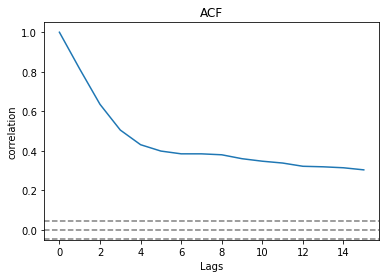

In [14]:
#Plotting graph
plt.plot(a)
plt.xlabel('Lags')
plt.ylabel('correlation')
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df['AvgTemp'])),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df['AvgTemp'])),linestyle='--',color='gray')
plt.title('ACF')

Text(0.5, 1.0, 'PACF')

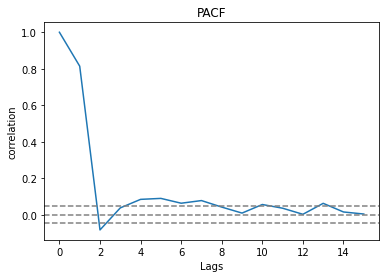

In [15]:
plt.plot(pa)
plt.xlabel('Lags')
plt.ylabel('correlation')
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df['AvgTemp'])),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df['AvgTemp'])),linestyle='--',color='gray')
plt.title('PACF')

In [16]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

In [17]:
stepwise_fit=auto_arima(df['AvgTemp'],trace=True,suppress_warnings=True)
stepwise_fit.summary()              

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=8343.696, Time=2.74 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=10347.755, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=8365.701, Time=0.26 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=9136.225, Time=0.38 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=19192.139, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=8355.947, Time=1.77 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=8356.308, Time=2.40 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=8347.333, Time=3.06 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=8317.842, Time=3.25 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=8330.190, Time=2.90 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=8311.075, Time=3.68 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=8332.529, Time=3.82 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=8317.457, Time=4.21 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=8306.397, Time=3.90 sec
 ARIMA(1,0,4)(0,0,0)[0] interce

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1821
Model:               SARIMAX(1, 0, 5)   Log Likelihood               -4139.602
Date:                Sun, 03 Jul 2022   AIC                           8295.204
Time:                        20:53:11   BIC                           8339.261
Sample:                             0   HQIC                          8311.457
                               - 1821                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.2877      0.385      3.343      0.001       0.533       2.043
ar.L1          0.9723      0.008    117.243      0.000       0.956       0.989
ma.L1         -0.1199      0.024     -4.988      0.000      -0.167      -0.073
ma.L2         -0.2165      0.024     -8.869      0.000      -0.264      -0.169
ma.L3         -0.2039      0.024     -8.445      0.000      -0.251      -0.157
ma.L4         -0.1334      0.023     -5.811      0.000      -0.178      -0.088
ma.L5         -0.0482      0.025     -1.964      0.050      -0.096      -0.000
sigma2         5.5376      0.175     31.713      0.000       5.195       5.880
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                20.71
Prob(Q):                              0.86   Prob(JB):                         0.00
Heteroskedasticity (H):               0.81   Skew:                            -0.17
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [18]:
# Importing ARIMA model
from statsmodels.tsa.arima_model import ARIMA

In [19]:
print(df.shape)
train=df.iloc[:-30]
test=df.iloc[-30:]
print(train.shape,test.shape)

(1821, 5)
(1791, 5) (30, 5)


In [20]:
model=ARIMA(train['AvgTemp'],order=(1,0,5))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                AvgTemp   No. Observations:                 1791
Model:                     ARMA(1, 5)   Log Likelihood               -4070.198
Method:                       css-mle   S.D. of innovations              2.347
Date:                Sun, 03 Jul 2022   AIC                           8156.395
Time:                        20:53:13   BIC                           8200.320
Sample:                             0   HQIC                          8172.614
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            46.5857      0.785     59.355      0.000      45.047      48.124
ar.L1.AvgTemp     0.9856      0.007    150.630      0.000       0.973       0.998
ma.L1.AvgTemp    -0.1412      0.025     -5.735      0.000      -0.190      -0.093
ma.L2.AvgTemp    -0.2268      0.024     -9.295      0.000      -0.275      -0.179
ma.L3.AvgTemp    -0.2168      0.026     -8.416      0.000      -0.267      -0.166
ma.L4.AvgTemp    -0.1479      0.023     -6.300      0.000      -0.194      -0.102
ma.L5.AvgTemp    -0.0594      0.025     -2.411      0.016      -0.108      -0.011
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0146           +0.0000j            1.0146            0.0000
MA.1            1.0883           -0.0000j            1.0883           -0.0000
MA.2            0.0555           -1.8423j            1.8431           -0.2452
MA.3            0.0555           +1.8423j            1.8431            0.2452
MA.4           -1.8432           -1.0734j            2.1330           -0.4161
MA.5           -1.8432           +1.0734j            2.1330            0.4161
-----------------------------------------------------------------------------
"""

In [21]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='level')
pred.index=df.index[start:end+1]
print(pred)

DATE
2018-12-01    44.754153
2018-12-02    44.987870
2018-12-03    45.388833
2018-12-04    45.721635
2018-12-05    45.863812
2018-12-06    45.874207
2018-12-07    45.884453
2018-12-08    45.894551
2018-12-09    45.904504
2018-12-10    45.914313
2018-12-11    45.923981
2018-12-12    45.933510
2018-12-13    45.942902
2018-12-14    45.952158
2018-12-15    45.961282
2018-12-16    45.970273
2018-12-17    45.979136
2018-12-18    45.987870
2018-12-19    45.996479
2018-12-20    46.004964
2018-12-21    46.013327
2018-12-22    46.021569
2018-12-23    46.029693
2018-12-24    46.037699
2018-12-25    46.045590
2018-12-26    46.053368
2018-12-27    46.061034
2018-12-28    46.068589
2018-12-29    46.076035
2018-12-30    46.083375
dtype: float64


<AxesSubplot:xlabel='DATE'>

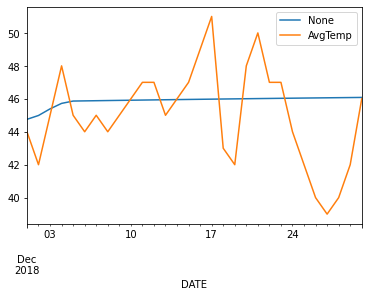

In [22]:
pred.plot(legend=True)
test['AvgTemp'].plot(legend=True)

In [23]:
test['AvgTemp'].mean()

45.0

In [24]:
# Calculating RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred,test['AvgTemp']))
print(rmse)

3.0004943595512423
